# Starbucks Drink Calories - A Report
## Data Storytelling report by Soumyadip Kundu

### Background Information

Starbucks is an American coffee chain serving an assortment of coffee, different ecstatic beverages as well as food. It started in Seattle in 1971 and since then have gone on to become one of the largest coffee chains in the world. Starbucks sells several different varieties of drinks ranging from coffees, teas to a large variety of their exotic signature drinks. Customers can also customize their drinks based on their taste profile.

### Dataset

The dataset was obtained from the Kaggle website. The dataset contains several calorific information as well as detailed nutritional information of each of the drinks. The original dataset has been taken from Starbucks website

### Objectives

The objective of this study is to analyze the relation between calorific values and drinks and explore the various relationships between individual drinks and their nutrient contents.

### Outline
1. Importing Libraries
2. Loading the dataset
3. Cleaning the dataset
4. Data visualization and EDA
5. Conclusion

**Importing Relevant Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

### Load the dataset

We first load the data from the csv file into a pandas dataframe and try to visualize the different columns. We then try to find out the presence of any null or missing values in the columns.

In [3]:
sb_df = pd.read_csv("starbucks_drinkMenu_expanded.csv")
sb_df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [4]:
sb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

### Data Cleaning

In [5]:
sb_df.isnull().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64

There are 242 rows and 18 columns in the dataframe. Out of those just one value is missing in the Caffeine column. We went ahead and found out the most common amount of caffeine content and replaced the missing value with that number(125).

In [6]:
sb_df = sb_df.fillna(125)
sb_df.isnull().any()

Beverage_category            False
Beverage                     False
Beverage_prep                False
Calories                     False
 Total Fat (g)               False
Trans Fat (g)                False
Saturated Fat (g)            False
 Sodium (mg)                 False
 Total Carbohydrates (g)     False
Cholesterol (mg)             False
 Dietary Fibre (g)           False
 Sugars (g)                  False
 Protein (g)                 False
Vitamin A (% DV)             False
Vitamin C (% DV)             False
 Calcium (% DV)              False
Iron (% DV)                  False
Caffeine (mg)                False
dtype: bool

We try to drop any duplicated values

In [7]:
sb_df.duplicated().sum()
sb_df.drop_duplicates(inplace=True)

We rename the Beverage category and calories columns.

In [8]:
sb_df.calories = sb_df[['Beverage_category','Calories']]
sb_df.calories.columns = ['DrinkMenu', 'Calories']
sb_df.calories

,DrinkMenu,Calories
0,Coffee,3
1,Coffee,4
2,Coffee,5
3,Coffee,5
4,Classic Espresso Drinks,70
...,...,...
237,Frappuccino® Blended Crème,320
238,Frappuccino® Blended Crème,170
239,Frappuccino® Blended Crème,200
240,Frappuccino® Blended Crème,180


### Data Visualizations

In [33]:
sb_df['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

**Plot of Beverage category**

<AxesSubplot:xlabel='count', ylabel='DrinkMenu'>

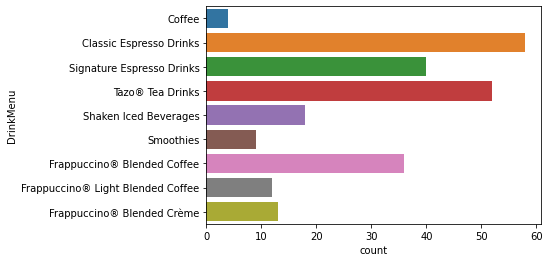

In [9]:
sns.countplot(y='DrinkMenu', data=sb_df.calories)

We can see that classic expresso drinks have the highest count

**Calories and sugars in each drink distributions**

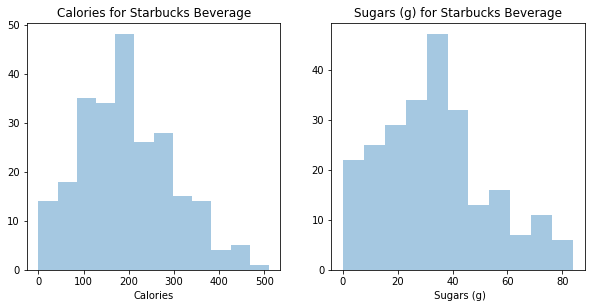

In [26]:
ax, fig = plt.subplots(figsize =(10,10))
ax1 = plt.subplot(221)
sns.distplot(sb_df.Calories, kde = False)
ax2 = plt.subplot(222)
sns.distplot(sb_df[' Sugars (g)'], kde=False)
ax1.set_title('Calories for Starbucks Beverage')
ax2.set_title('Sugars (g) for Starbucks Beverage')
plt.show()

**Fat distribution in Starbucks menu items**

Text(0, 0.5, 'Count')

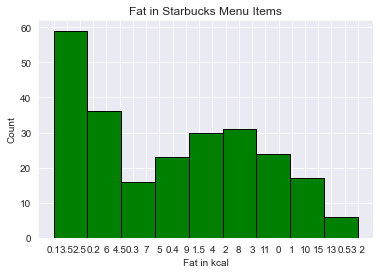

In [37]:
fat = sb_df[" Total Fat (g)"]
plt.hist(fat, bins=9, edgecolor = "black", color = "green")
plt.title("Fat in Starbucks Menu Items")
plt.xlabel("Fat in kcal")
plt.ylabel("Count")

**Plot to see the drink with the highest calory count**

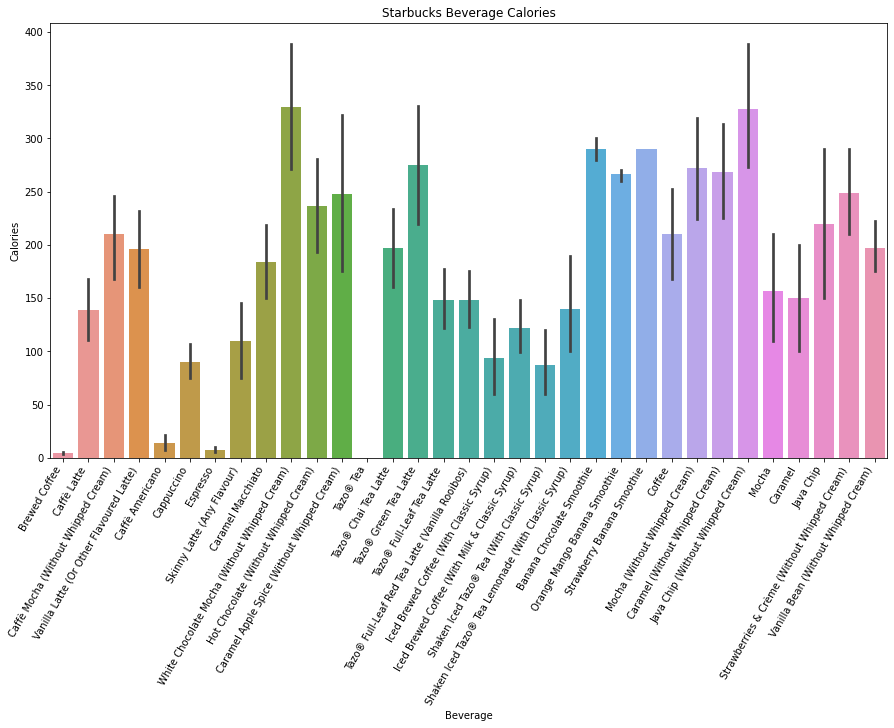

In [11]:
plt.figure(figsize=(15, 8))
sns.barplot(x="Beverage", y="Calories", data=sb_df)
plt.xticks(rotation=60, ha='right')
plt.title("Starbucks Beverage Calories")
plt.show()

Overall, White chocolate mocha (without whipped cream), followed by Java Chip (Without Whipped Cream) out of the entire starbucks drinks have the highest calory content

**Correlation between calories, sugars and sodium content**

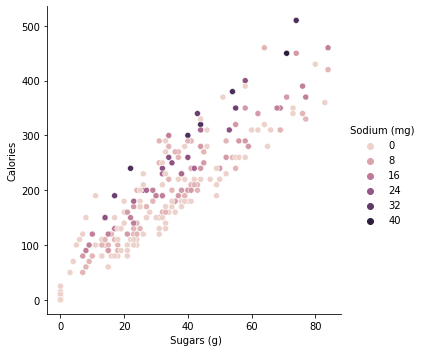

In [13]:
sns.relplot(x=sb_df[' Sugars (g)'],y = sb_df['Calories'],kind = 'scatter', hue=sb_df[' Sodium (mg)'])
plt.show()

There seems to be a positive correlation between sugar content and sodium content and calory content.

**New dataframe to extract classic drinks from beverage categories**

In [14]:
classic = sb_df.loc[(sb_df['Beverage_category'] == 'Classic Espresso Drinks')]
classic.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
5,Classic Espresso Drinks,Caffè Latte,2% Milk,100,3.5,2.0,0.1,15,85,10,0,9,6.0,10%,0%,20%,0%,75
6,Classic Espresso Drinks,Caffè Latte,Soymilk,70,2.5,0.4,0.0,0,65,6,1,4,5.0,6%,0%,20%,8%,75
7,Classic Espresso Drinks,Caffè Latte,Tall Nonfat Milk,100,0.2,0.2,0.0,5,120,15,0,14,10.0,15%,0%,30%,0%,75
8,Classic Espresso Drinks,Caffè Latte,2% Milk,150,6,3.0,0.2,25,135,15,0,14,10.0,15%,0%,30%,0%,75


**Plot to see which classic drink has the most calories**

Text(0.5, 1.0, 'Starbucks Classic Drinks Calories')

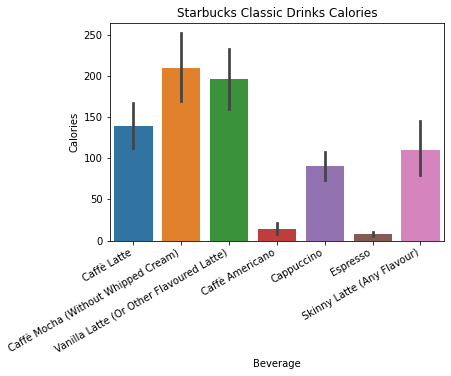

In [15]:
sns.barplot(x="Beverage", y="Calories", data=classic)
plt.xticks(rotation=30, ha='right')
plt.title("Starbucks Classic Drinks Calories")

Caffe Mocha (without whipped cream) has the highest kcal, followed by vanilla latte(or other flavoured latte) from the Starbucks classic espresso drinks.

**Sugar content of each beverage category**

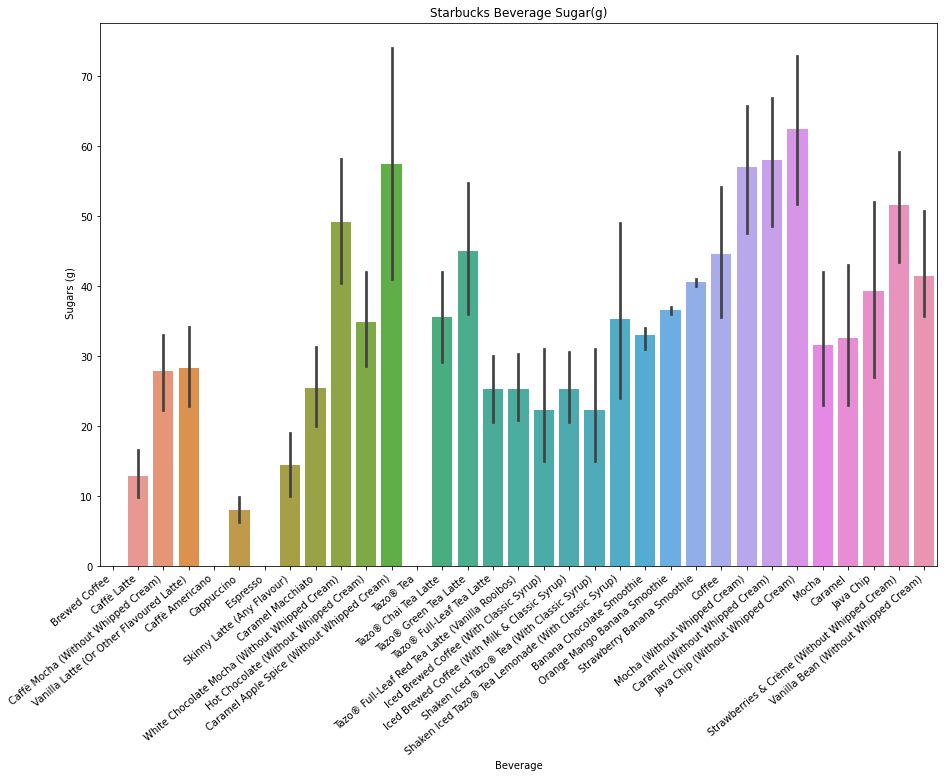

In [16]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Beverage", y=" Sugars (g)", data=sb_df)
plt.xticks(rotation=40, ha='right')
plt.title("Starbucks Beverage Sugar(g)")
plt.show()

FrappuccinoÂ® Blended Coffee in venti size has the highest sugar content than Classic Espresso Drinks, TazoÂ® Tea Drinks, Coffee.


**Sodium content of each beverage category**

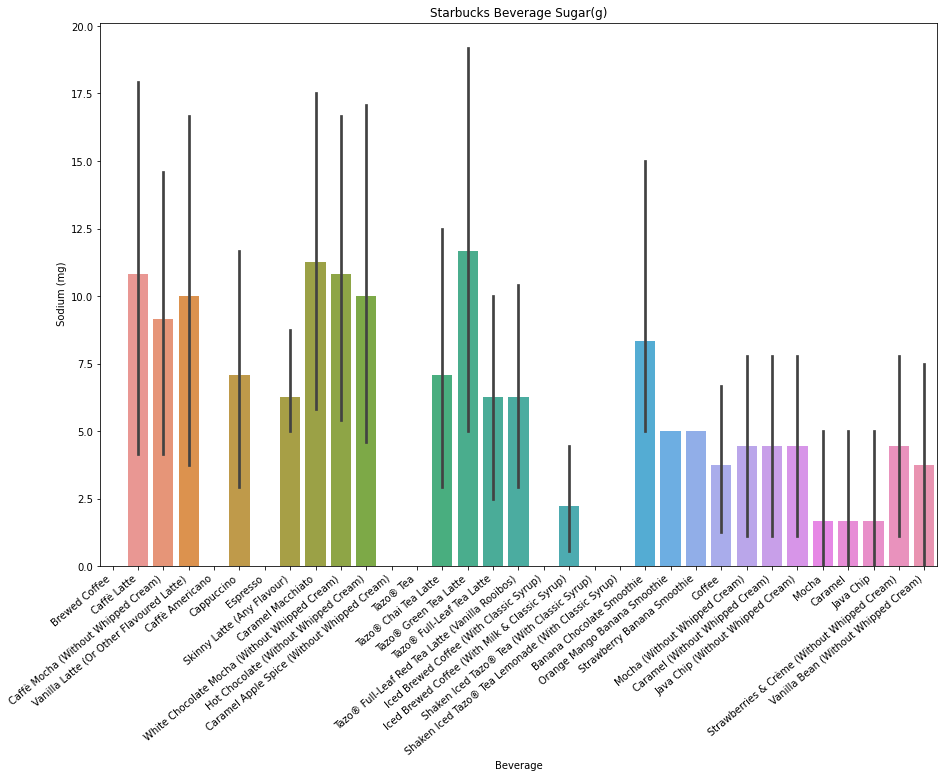

In [17]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Beverage", y=' Sodium (mg)', data=sb_df)
plt.xticks(rotation=40, ha='right')
plt.title("Starbucks Beverage Sugar(g)")
plt.show()

Tazo Chai green tea latte has the highest sodium content followed by caramel macchiato

**Extracting signature espresso drinks from the dataframe**

In [34]:
signature = sb_df.loc[(sb_df['Beverage_category'] == 'Signature Espresso Drinks')]
signature.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
62,Signature Espresso Drinks,Caramel Macchiato,Short Nonfat Milk,100,1,0.5,0.0,5,70,17,0,15,6.0,10%,0%,15%,0%,75
63,Signature Espresso Drinks,Caramel Macchiato,2% Milk,120,4,2.0,0.1,15,80,16,0,15,5.0,10%,0%,15%,0%,75
64,Signature Espresso Drinks,Caramel Macchiato,Soymilk,100,3,1.0,0.0,0,60,14,1,11,4.0,6%,0%,15%,8%,75
65,Signature Espresso Drinks,Caramel Macchiato,Tall Nonfat Milk,140,1,0.5,0.0,5,105,25,0,24,8.0,15%,0%,25%,0%,75
66,Signature Espresso Drinks,Caramel Macchiato,2% Milk,180,5,3.0,0.1,20,115,25,0,23,8.0,15%,0%,25%,0%,75


**Sugar content of Signature Espresso drinks**

Text(0.5, 1.0, 'Starbucks Signature Espresso Drinks Sugars(g)')

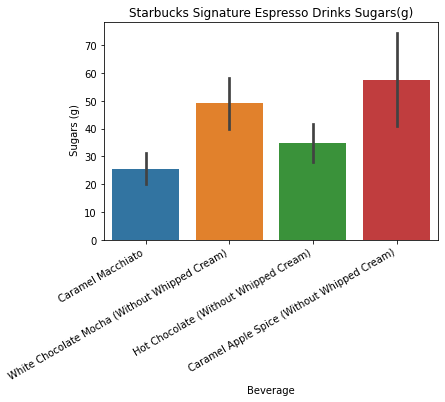

In [19]:
sns.barplot(x='Beverage', y=' Sugars (g)', data=signature)
plt.xticks(rotation=30, ha='right')
plt.title("Starbucks Signature Espresso Drinks Sugars(g)")

Caramel apple spice has the highest sugar content among signature drinks

**Analyzing the different drinks based on their total carbohydrate content**

<Figure size 1080x1080 with 0 Axes>

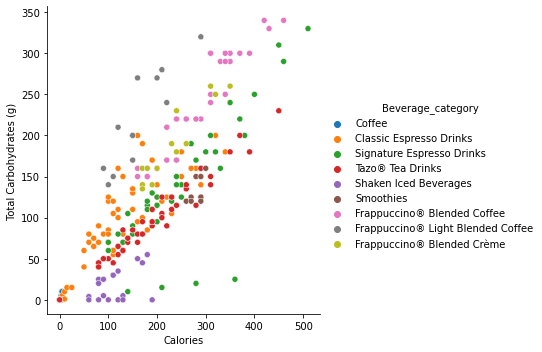

In [20]:
plt.figure(figsize=(15,15))
sns.relplot(data=sb_df, x="Calories", y=" Total Carbohydrates (g) ",hue="Beverage_category",kind = "scatter")
plt.show()

Correlation between calories and total fat content

<Figure size 576x432 with 0 Axes>

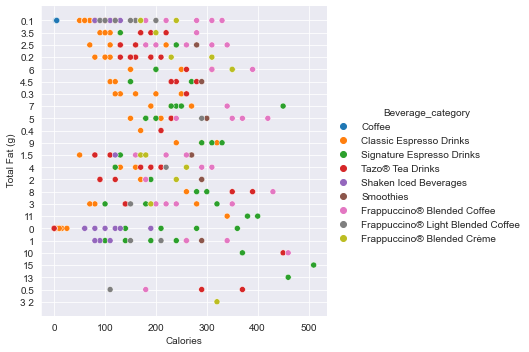

In [38]:
plt.figure(figsize=(8,6))
sns.relplot(data=sb_df, x="Calories", y=" Total Fat (g)", hue="Beverage_category", kind='scatter')
plt.show()

**Performing a t-test between the lite drinks and the regular drinks**

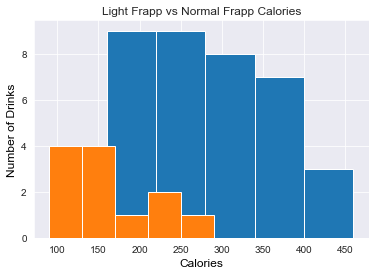

Ttest_indResult(statistic=-5.294136758785789, pvalue=1.4797997905959377e-05)

In [30]:
lite = sb_df[sb_df.Beverage_category == 'Frappuccino® Light Blended Coffee'].Calories
reg = sb_df[sb_df.Beverage_category == 'Frappuccino® Blended Coffee'].Calories

sns.set_style("darkgrid")
plt.hist(reg, bins = 5)
plt.hist(lite, bins = 5)
plt.title('Light Frapp vs Normal Frapp Calories')
plt.ylabel("Number of Drinks", fontsize = 12, color = "black")
plt.xlabel("Calories", fontsize = 12, color = "Black")
plt.show()

stats.ttest_ind(lite, reg, equal_var = False)

The p-value of the t-test is really small (0.0000148), which means that there is a significant difference between the light and the regular drink styles. This was expected as the style of drink "Light" would be prepared with a lighter look on calories.

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

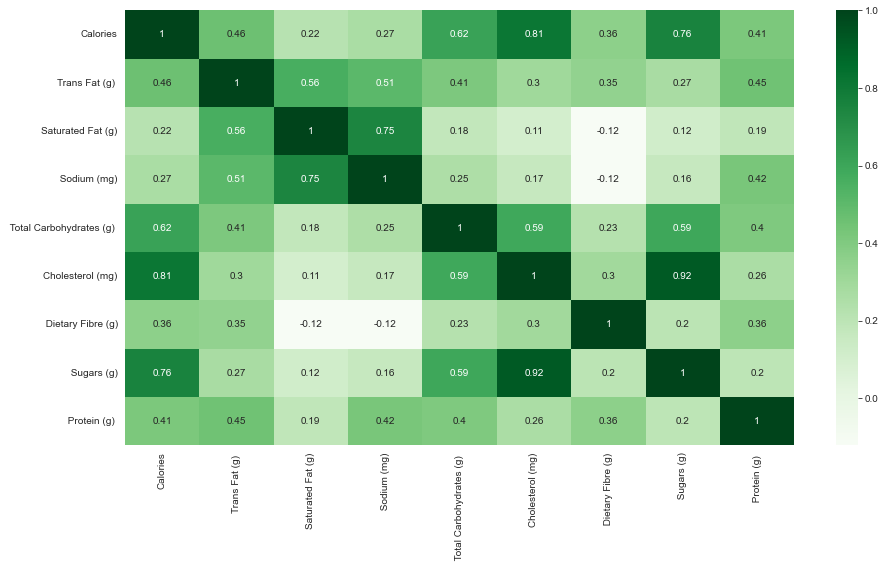

In [40]:
corr = sb_df.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, cmap="Greens")
sb_df.columns

### Conclusion

According to final heatmap analysis there are strong correlations between:
1. cholesterol and sugars 0.92
2. calories and cholesterol 0.81
3. calories and sugars 0.76

The t-test carried out shows Starbucks is truthful in their distinction between light and regular drinks. Even though there is high correlation between calories and sugars and also between calories and total carbohydrates, there doesnt seem to be too much of a correlation between calories and total fat. A clustering study could be done to cluster similar drinks based on their sugar or sodium content together. A dendogram can also be created to see which drinks are close together in their calorific content.